   <h1>Sales analysis for the Cake shop 

In [126]:
from IPython import display

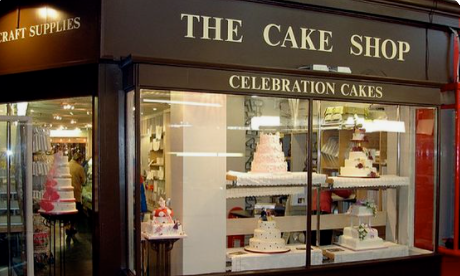

In [135]:
display.Image("cake shop.PNG",width=400 ,height=400)

Objective 
- What sales of each cake of each item that selling 
 ( Whether it's increasing or decreasing). 
- Compare the items that have in store.   

In [1]:
#data Manipulation
!pip install pandas
import pandas as pd

#Data vistialization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Create data frame
df = pd.DataFrame({
    
    
          "Item":["Coffee","Tea","Cake"],
          "Sales":[5000,4000,3000]

})

df

,Item,Sales
0,Coffee,5000
1,Tea,4000
2,Cake,3000


<h1> Case study

In [11]:
#import Excel files  
# การเลือกข้อมูลแบบเจาะจง
# df(df.Item==[" Sponge Cake  "])  ==>>>>เลือกสินค้าที่ต้องการเลือก
# df[df.Quantity]==800]  ===>>>> เลือกยอดชายที่เท่ากับ 800
# df[df.Quantity]>=800]   ===>>>> เลือกยอดขายที่มากกว่าหรือเท่ากับ 800 
# df[df.Date == "8/31/22"]   ===>>>> เลือกข้อมูลที่เป็น เดือน 

df=pd.read_excel('sales.xlsx',index_col=0)
df

,Item,Date,Quantity,Unit Price,Sales
id,,,,,
1,Sponge Cake,2022-01-31,NaN,12,11400
2,Vanilla Cake,2022-01-31,800.0,14,11200
3,Chocolate Cake,2022-01-31,2000.0,16,32000
4,Sponge Cake,2022-02-28,NaN,12,12000
5,Vanilla Cake,2022-02-28,850.0,14,11900
6,Chocolate Cake,2022-02-28,1900.0,16,30400
7,Sponge Cake,2022-03-31,1100.0,12,13200
8,Vanilla Cake,2022-03-31,800.0,14,11200
9,Chocolate Cake,2022-03-31,1800.0,16,28800


In [16]:
# Exploret the type of variables
df
df.dtypes

Item                  object
Date          datetime64[ns]
Quantity             float64
Unit Price             int64
Sales                  int64
dtype: object

In [18]:
#small summary detail Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Item        36 non-null     object        
 1   Date        36 non-null     datetime64[ns]
 2   Quantity    34 non-null     float64       
 3   Unit Price  36 non-null     int64         
 4   Sales       36 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [20]:
df.head(10)

,Item,Date,Quantity,Unit Price,Sales
id,,,,,
1,Sponge Cake,2022-01-31,NaN,12,11400
2,Vanilla Cake,2022-01-31,800.0,14,11200
3,Chocolate Cake,2022-01-31,2000.0,16,32000
4,Sponge Cake,2022-02-28,NaN,12,12000
5,Vanilla Cake,2022-02-28,850.0,14,11900
6,Chocolate Cake,2022-02-28,1900.0,16,30400
7,Sponge Cake,2022-03-31,1100.0,12,13200
8,Vanilla Cake,2022-03-31,800.0,14,11200
9,Chocolate Cake,2022-03-31,1800.0,16,28800


In [21]:
df.Item.shape

(36,)

In [22]:
df.shape

(36, 5)

## #Goals : 
1. Sales is increasing or decrasing , what we  need to fix and what we need to keep doing   
2. Compare the items 

In [32]:
df

,Item,Date,Quantity,Unit Price,Sales
id,,,,,
1,Sponge Cake,2022-01-31,NaN,12,11400
2,Vanilla Cake,2022-01-31,800.0,14,11200
3,Chocolate Cake,2022-01-31,2000.0,16,32000
4,Sponge Cake,2022-02-28,NaN,12,12000
5,Vanilla Cake,2022-02-28,850.0,14,11900
6,Chocolate Cake,2022-02-28,1900.0,16,30400
7,Sponge Cake,2022-03-31,1100.0,12,13200
8,Vanilla Cake,2022-03-31,800.0,14,11200
9,Chocolate Cake,2022-03-31,1800.0,16,28800


In [34]:
df
spongeCake = df[df.Item== "Sponge Cake"]
vanillaCake  = df[df.Item== "Vanilla Cake"]
chocolateCake =  df[df.Item== "Chocolate Cake"]

In [35]:
#Data vistialization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Numbers')

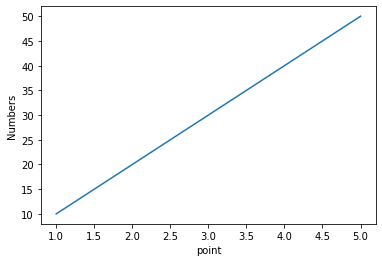

In [38]:
#create Graph 
x = [1,2,3,4,5]
y= [10,20,30,40,50]
plt.plot(x,y);
plt.xlabel("point")
plt.ylabel("Numbers")

In [39]:
spongeCake

,Item,Date,Quantity,Unit Price,Sales
id,,,,,
1,Sponge Cake,2022-01-31,NaN,12,11400
4,Sponge Cake,2022-02-28,NaN,12,12000
7,Sponge Cake,2022-03-31,1100.0,12,13200
10,Sponge Cake,2022-04-30,1200.0,12,14400
13,Sponge Cake,2022-05-31,1300.0,12,15600
16,Sponge Cake,2022-06-30,1400.0,12,16800
19,Sponge Cake,2022-07-31,1500.0,12,18000
22,Sponge Cake,2022-08-31,1600.0,12,19200
25,Sponge Cake,2022-09-30,1600.0,12,19200


Text(0.5, 1.0, 'Sponge Cake sales in 2022 ')

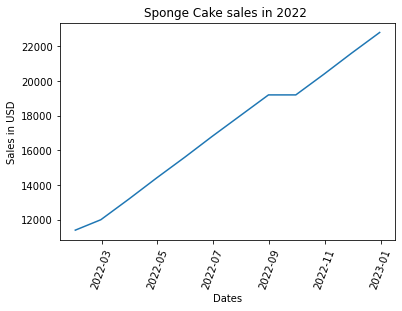

In [48]:
#Create chart relationships

spongeCakeDate= spongeCake.Date
spongeCakeSales = spongeCake.Sales
plt.plot(spongeCakeDate,spongeCakeSales)
plt.xticks(rotation=70);
plt.xlabel("Dates")
plt.ylabel("Sales in USD")
plt.title("Sponge Cake sales in 2022 ")

Text(0.5, 1.0, 'vanilla Cake sales in 2022 ')

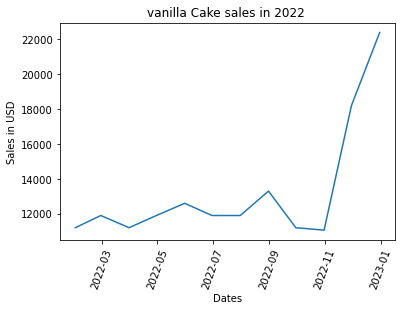

In [49]:
vanillaCakeDate= vanillaCake.Date
vanillaCakeSales = vanillaCake.Sales
plt.plot(vanillaCakeDate,vanillaCakeSales)
plt.xticks(rotation=70);
plt.xlabel("Dates")
plt.ylabel("Sales in USD")
plt.title("vanilla Cake sales in 2022 ")

Text(0.5, 1.0, 'chocolate Cake sales in 2022 ')

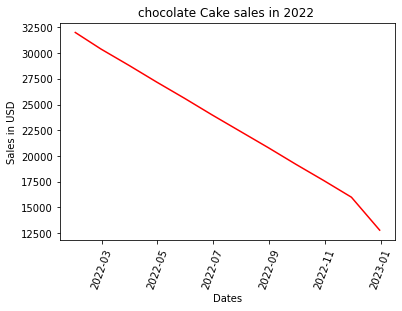

In [51]:
chocolateCakeDate= chocolateCake.Date
chocolateCakeSales = chocolateCake.Sales
plt.plot(chocolateCakeDate,chocolateCakeSales,color="red");
plt.xticks(rotation=70);
plt.xlabel("Dates")
plt.ylabel("Sales in USD")
plt.title("chocolate Cake sales in 2022 ")

###### Data vistualization comparision sales of cale by each  type 

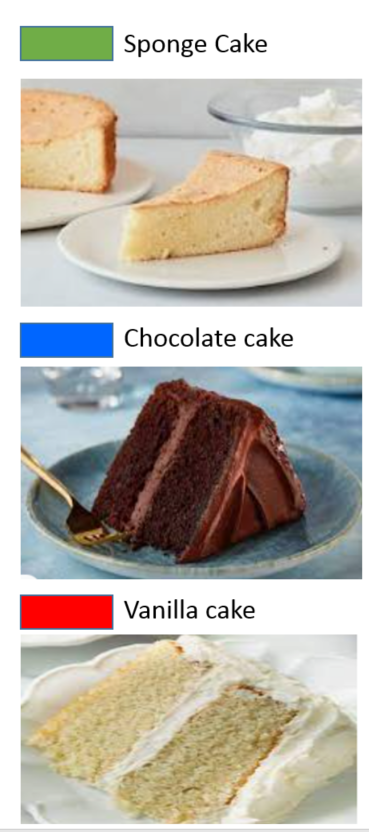

In [134]:
display.Image("Cake.PNG",width=200 ,height=400)

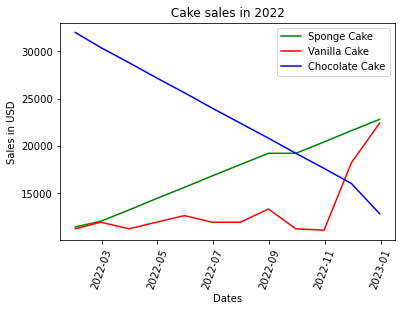

In [54]:
# Sales analysis include 3 product
plt.plot(spongeCakeDate,spongeCakeSales,color="Green");
plt.plot(vanillaCakeDate,vanillaCakeSales,color="red");
plt.plot(chocolateCakeDate,chocolateCakeSales,color="Blue");
plt.xticks(rotation=70);
plt.xlabel("Dates")
plt.ylabel("Sales in USD")
plt.title(" Cake sales in 2022 ")
plt.legend(["Sponge Cake","Vanilla Cake","Chocolate Cake"])

In [60]:
#comment  1 as you can see , the sponge cake  don't have a problem  with this ,but it's sales are increasing .
# this is a positive sign .We need to know why it's increasing ,not we want to change that . We want to keep doing .
#what are something that we are doing . 
# for the vanila cake , the sales where we're almost steady throught the year  so we need to find out why it increased sharply like this
#it a good sign , if's because of maybe a marketing effort,then we need to keep doing 
# on the other hand the chocolate cakes is decreasing sharply and it also in the same breath  
#and obviously this a horrible sign and we need to quickly findout why our cholat maybe we have change stagegies or Marketing plan.

In [70]:
#  So obviusly, the sales from chocolates cakes is the biggest fear ,and if you compare that the graphic 
# eventhough the chocolate cake decreased ,the sales decreased thought the year,  
#chololate make the most sales we make money from that cake they must sell  . most of all sales come from cholatecake 
# we have a problem about the cholatcake .if we don't solve it . we are going to be out of business .

## Stat function

one of the most important things in analyzing data is using the statistical methods such as the standard deviation , Mean , thest functiuon 
are super important helpful is give you about the what going on

In [62]:
df

,Item,Date,Quantity,Unit Price,Sales
id,,,,,
1,Sponge Cake,2022-01-31,NaN,12,11400
2,Vanilla Cake,2022-01-31,800.0,14,11200
3,Chocolate Cake,2022-01-31,2000.0,16,32000
4,Sponge Cake,2022-02-28,NaN,12,12000
5,Vanilla Cake,2022-02-28,850.0,14,11900
6,Chocolate Cake,2022-02-28,1900.0,16,30400
7,Sponge Cake,2022-03-31,1100.0,12,13200
8,Vanilla Cake,2022-03-31,800.0,14,11200
9,Chocolate Cake,2022-03-31,1800.0,16,28800


In [63]:
df.std()

C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Date          106 days 17:37:16.259165370
Quantity                       390.274824
Unit Price                       1.656157
Sales                         6039.645738
dtype: object

In [64]:
df.Sales.std()

6039.645737534664

In [65]:
df.median()

C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/530051474.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()
C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Quantity       1300.0
Unit Price       14.0
Sales         17200.0
dtype: float64

In [66]:
df.sum()

C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


Item          Sponge CakeVanilla CakeChocolate CakeSponge Ca...
Quantity                                                43740.0
Unit Price                                                  504
Sales                                                    640160
dtype: object

In [67]:
spongeCake.sum()

C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/2874023769.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spongeCake.sum()


Item          Sponge CakeSponge CakeSponge CakeSponge CakeSp...
Quantity                                                15100.0
Unit Price                                                  144
Sales                                                    204600
dtype: object

In [68]:
vanillaCake.sum()

C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/2227848681.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vanillaCake.sum()


Item          Vanilla CakeVanilla CakeVanilla CakeVanilla Ca...
Quantity                                                11340.0
Unit Price                                                  168
Sales                                                    158760
dtype: object

In [69]:
chocolateCake.sum()

C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/1980028388.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chocolateCake.sum()


Item          Chocolate CakeChocolate CakeChocolate CakeChoc...
Quantity                                                17300.0
Unit Price                                                  192
Sales                                                    276800
dtype: object

In [ ]:
#  So obviusly, the sales from chocolates cakes is the biggest fear ,and if you compare that the graphic 
# eventhough the chocolate cake decreased ,the sales decreased thought the year,  
#chololate make the most sales we make money from that cake they must sell  . most of all sales come from cholatecake 
# we have a problem about the cholatcake .if we don't solve it . we are going to be out of business .

In [71]:
spongeCake.mean()

C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/1830576000.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  spongeCake.mean()
C:\Users\s00943\AppData\Local\Temp/ipykernel_36320/1830576000.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spongeCake.mean()


Quantity       1510.0
Unit Price       12.0
Sales         17050.0
dtype: float64

In [72]:
# EDA  Sponge Cake 
spongeCake.Sales.mean()

17050.0

In [73]:
# EDA  Sponge Cake 
spongeCake.Sales.median()

17400.0

In [74]:
# EDA  Valina Cake 
vanillaCake.Sales.mean()

13230.0

In [75]:
# EDA  Valina Cake 
vanillaCake.Sales.median()

11900.0

In [76]:
# EDA  Cholat Cake 
chocolateCake.Sales.mean()


23066.666666666668

In [77]:
# EDA  Cholat Cake 
chocolateCake.Sales.median()

23200.0

    EDA SUMMARY 
    Average sales of chocolate cake is biggest than each other 
    Spinge cake = 17,400
    Vanilla Cake  =  11,900
    Chocolate Cake = 23,066
    
    
    Median 
    Spinge cake =17400
    Vanilla Cake  =  11900
    Chocolate Cake = 23200
    
    
    
    
    
    

#### Clean Data 

In [85]:
# reolace empty cell with the mean 
dfcopy = df.copy()
spongeCakeQuantity = spongeCake.Quantity
spongeCakeQuantityMean= spongeCake.Quantity.mean()
spongeCakeQuantityMean

1510.0

In [88]:
dfcopy["Quantity"].fillna(spongeCakeQuantityMean, inplace =True)
dfcopy1 = df.copy()


,Item,Date,Quantity,Unit Price,Sales
id,,,,,
1,Sponge Cake,2022-01-31,1510.0,12,11400
2,Vanilla Cake,2022-01-31,800.0,14,11200
3,Chocolate Cake,2022-01-31,2000.0,16,32000
4,Sponge Cake,2022-02-28,1510.0,12,12000
5,Vanilla Cake,2022-02-28,850.0,14,11900
6,Chocolate Cake,2022-02-28,1900.0,16,30400
7,Sponge Cake,2022-03-31,1100.0,12,13200
8,Vanilla Cake,2022-03-31,800.0,14,11200
9,Chocolate Cake,2022-03-31,1800.0,16,28800


In [98]:
# Summary the overall Sales by product  
total=df.groupby(by=["Item","Date"]).sum().groupby(level=[0]).sum()
total

,Quantity,Unit Price,Sales
Item,,,
Chocolate Cake,17300.0,192,276800
Sponge Cake,15100.0,144,204600
Vanilla Cake,11340.0,168,158760


([<matplotlib.patches.Wedge at 0x202229f6fa0>,
 [Text(0.23188408163289323, 1.075281252828891, 'Chocolate Cake'),
  Text(-0.9205410876585547, -0.6021661780043822, 'Sponge Cake'),
  Text(0.7826880245570781, -0.7729162025827502, 'Vanilla Cake')],
 [Text(0.12648222634521447, 0.5865170469975769, '43.24%'),
  Text(-0.5021133205410298, -0.3284542789114812, '31.96%'),
  Text(0.4269207406674971, -0.42159065595422734, '24.80%')])

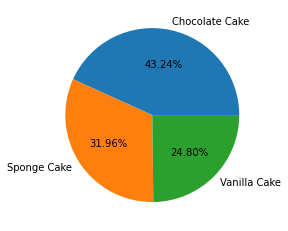

In [101]:
plt.pie(total.Sales,labels=total.index,explode=(0,0,0),autopct='%1.2f%%')

Text(0, 0.5, 'Sales in USD')

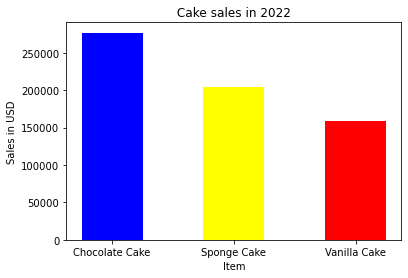

In [111]:
import seaborn as sns
plt.bar(total.index,total.Sales,width=.5, color=["blue","yellow","red"])
plt.title(" Cake sales in 2022 ")
plt.xlabel("Item")
plt.ylabel("Sales in USD")

In [93]:
df.groupby(by=["Item","Date"]).sum().groupby(level=[1]).sum()

,Quantity,Unit Price,Sales
Date,,,
2022-01-31,2800.0,42,54600
2022-02-28,2750.0,42,54300
2022-03-31,3700.0,42,53200
2022-04-30,3750.0,42,53500
2022-05-31,3800.0,42,53800
2022-06-30,3750.0,42,52700
2022-07-31,3750.0,42,52300
2022-08-31,3850.0,42,53300
2022-09-30,3600.0,42,49600
